In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [2]:
df = pd.read_csv("data/updated_customer_booking.csv",encoding="ISO-8859-1")

In [3]:
df = df.reset_index(drop=True)

In [4]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6.0,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6.0,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3.0,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6.0,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3.0,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6.0,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7.0,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6.0,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,NaN,PERPNH,Australia,1,0,1,5.62,0


## One hot encoding

In [5]:
df_final = df

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})

df_final = df_final.join(encoder_df)

In [7]:
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [8]:
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [9]:
label = df['booking_complete']

In [10]:
df_final = df_final.drop('booking_complete', axis=1)

In [11]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6.0,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6.0,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3.0,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6.0,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3.0,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6.0,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7.0,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6.0,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,NaN,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizing the values

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_final)

In [13]:
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [14]:
scaled_df['label']  = label

In [15]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,0.779524,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,0.779524,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-1.322470,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,0.779524,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-1.322470,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,0.779524,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.480189,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,0.779524,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,NaN,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


In [45]:
scaled_df.fillna(0,inplace=True)

## Correlation matrix

<Axes: >

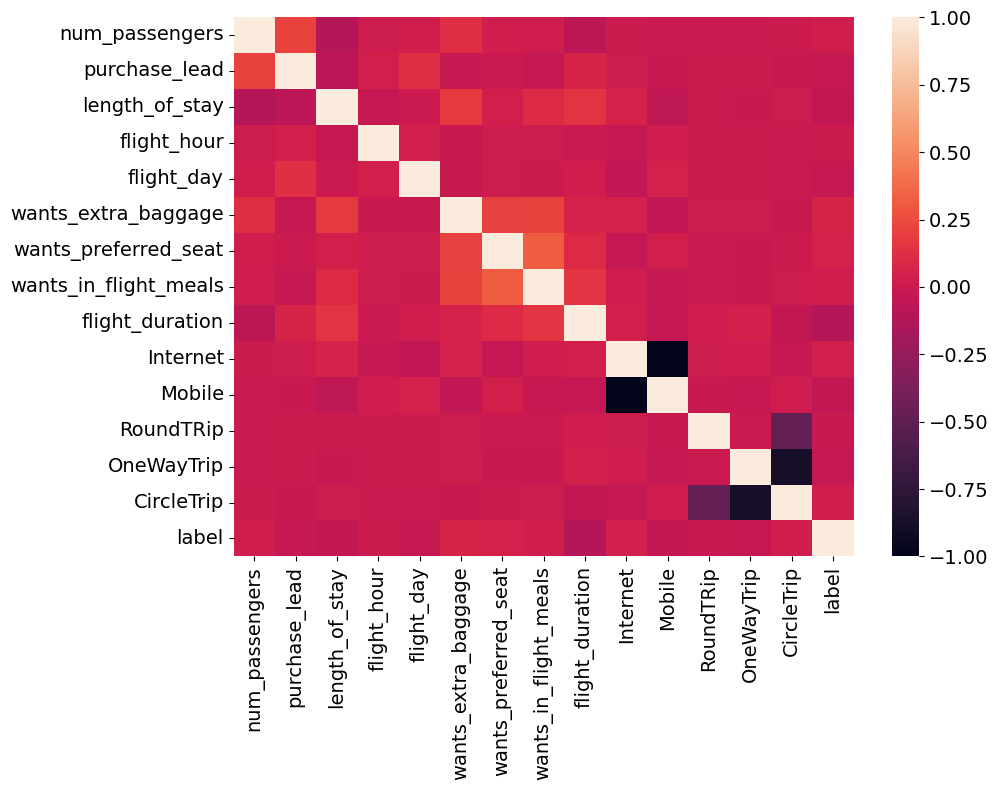

In [23]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(corr)

## Splitting train and test data

In [46]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [48]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

## Random Forest Classifier

In [49]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

Accuracy of the Training set

In [50]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.71 respectively


In [61]:
y_pred = clf_rf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train,y_pred)
print(f"accuracy of training dataset : {accuracy}")

accuracy of training dataset : 0.932325


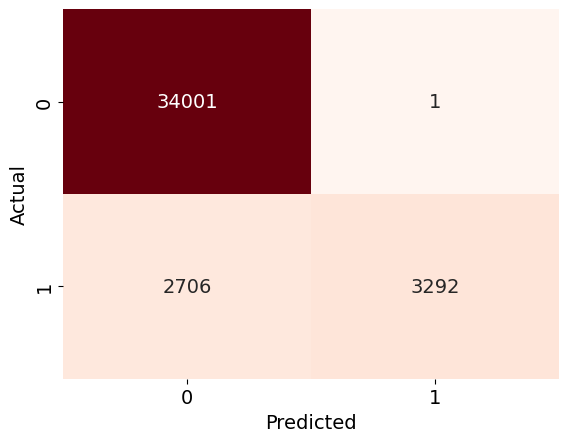

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy of the test dataset

In [62]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.48 and 0.08 respectively


In [64]:
y_pred = clf_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy of training dataset : {accuracy}")

accuracy of training dataset : 0.8514


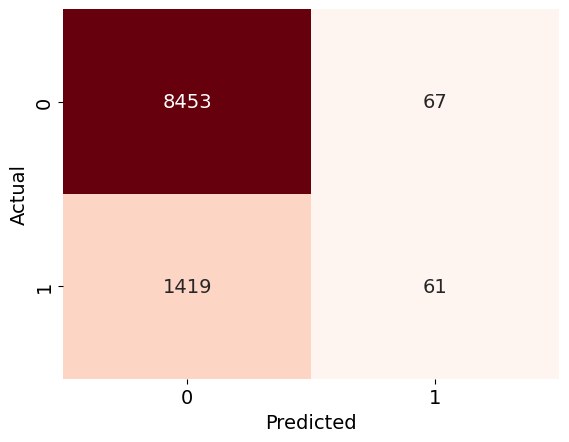

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

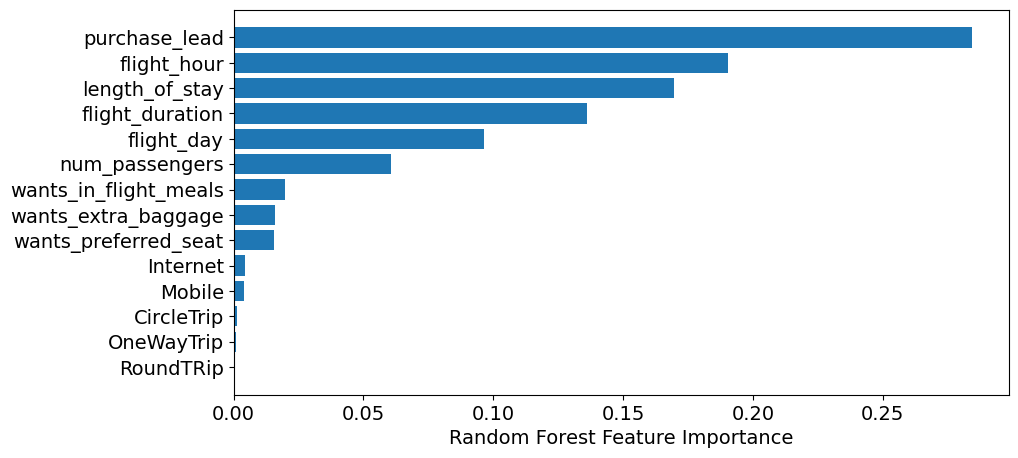

In [66]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

## Balancing the Dataset

In [67]:
scaled_df.label.value_counts()

label
0    42522
1     7478
Name: count, dtype: int64

In [68]:
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [69]:
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [70]:
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [71]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.579559,0.730339,-0.502977,-0.751272,0.000000,-1.420965,-0.649919,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
1,-0.579559,0.122272,-0.119353,0.357251,0.000000,-1.420965,-0.649919,-0.863497,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,0.520279,-0.502977,0.726759,-0.621805,0.703747,1.538654,-0.863497,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
3,-0.579559,-0.939083,-0.502977,-0.197010,-0.621805,-1.420965,-0.649919,-0.863497,-1.301108,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
4,-0.579559,-0.353127,0.175742,-0.936026,-1.322470,0.703747,-0.649919,-0.863497,-1.301108,-2.810688,2.810688,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,-0.579559,-0.541075,-0.502977,-1.305534,0.779524,0.703747,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15474,0.400684,1.050957,0.146233,0.357251,0.779524,0.703747,-0.649919,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15475,-0.579559,-0.496852,-0.178372,-0.197010,0.078859,-1.420965,1.538654,1.158082,-0.572911,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15476,-0.579559,-0.751135,-0.591506,0.542005,-0.621805,0.703747,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1


In [72]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [73]:
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [74]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively.")

Accuracy, precision, recall and f1-score for training data are 0.62, 0.6, 0.59, 0.65 and 0.59 respectively.


In [76]:
y_pred = clf_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy of training dataset : {accuracy}")

accuracy of training dataset : 0.6178940568475452


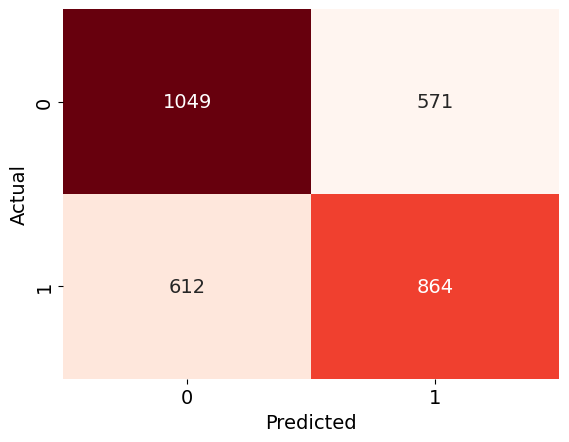

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

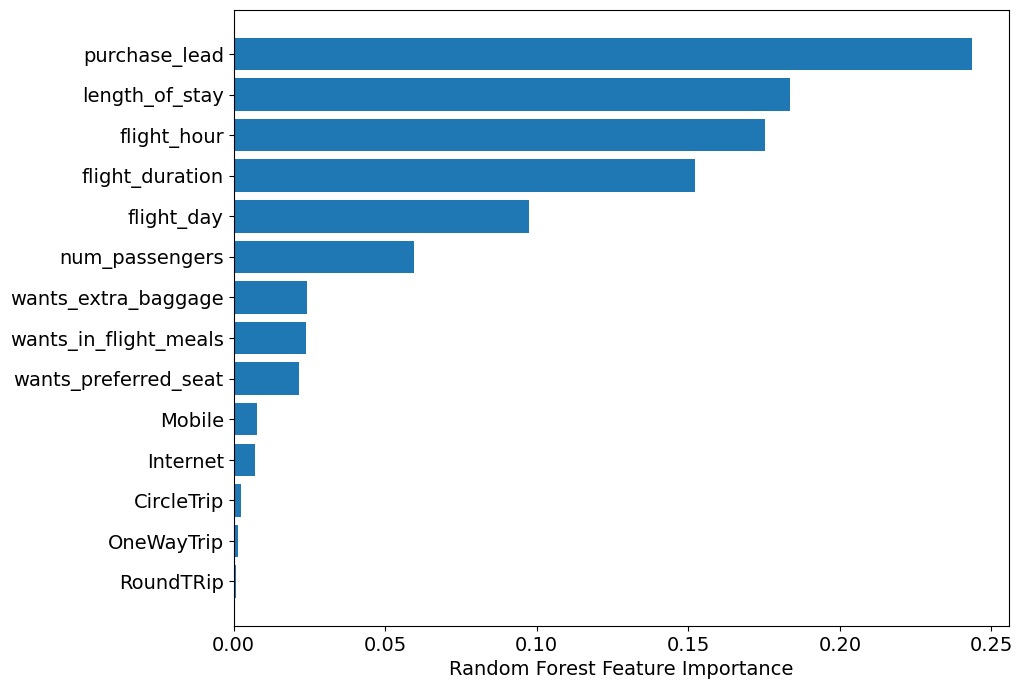

In [78]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")